# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [41]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [42]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.00089021486083 4.45107430415 -0.344746982227
0.00356078319308 4.45053495183 -0.365750353246
0.00801162728796 4.44922136132 -0.394589942672
0.0138597915481 2.53036719548 0.147546471028
0.0207227596054 2.52884659487 0.112567676604
0.0286022935795 2.52708636449 0.0757328001341
0.0383908025378 6.96468778023 -1.29853116423
0.0509810932867 6.95780678481 -1.34771169538
0.0663743004746 6.94903031934 -1.40315440817
0.084061060396 4.4128067196 -0.704288346082
0.103529794524 4.40505666554 -0.765623625117
0.124774750796 4.39656322257 -0.828104987216
0.147685994665 3.8736522248 -0.737050023154
0.17215275928 3.8649215148 -0.800530965066
0.198166738734 3.85562713283 -0.863937449449
0.225731022916 3.90540127373 -0.945001433195
0.254848171735 3.89481760683 -1.00773768342
0.285508041222 3.8836809824 -1.06990966991
0.31799892044 5.37559189896 -1.58301881304
0.352606581791 5.35845602719 -1.64373697461
0.389316046217 

22.3754551244 2.89567251455 -3.20684957583
22.6057761938 3.25443987772 -3.31587789325
22.8381805616 3.2610939931 -3.31925754457
23.0726636681 3.26749467865 -3.32254651507
23.3095161438 3.90961511935 -3.51653848049
23.5490247907 3.89935948316 -3.51480626729
23.7911771481 3.88925618885 -3.51310823033
24.0355057666 3.052340435 -3.26335234295
24.2815486895 3.06486176489 -3.26841111517
24.5293043997 3.07787144798 -3.27360013339
24.7787826011 3.10307303715 -3.28243072455
25.0299929902 3.11640314961 -3.28768412932
25.2829338628 3.12815101466 -3.29244731133
25.5384229923 4.87371254162 -3.81734313627
25.7972668819 4.83993266055 -3.80842882434
26.0594412822 4.80745264431 -3.79989641455
26.3244111247 3.56705445845 -3.4289778842
26.5916485801 3.56719265953 -3.43020721927
26.8611444442 3.56873732156 -3.43184548758
27.1327570149 3.36110688595 -3.37071771222
27.4063470659 3.37230233956 -3.37522373881
27.6819105882 3.38322917585 -3.37963536116
27.9589687514 3.17871255985 -3.31939837757
28.2370490083 3

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

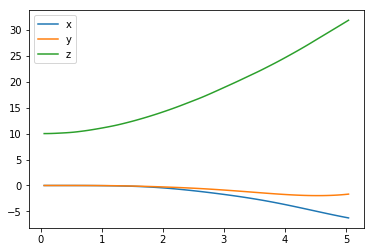

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

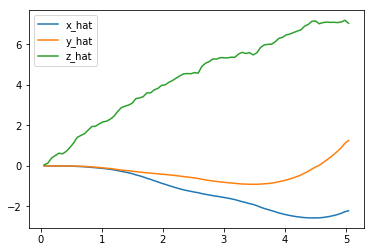

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

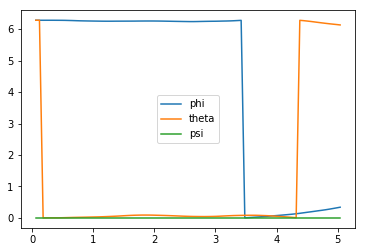

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

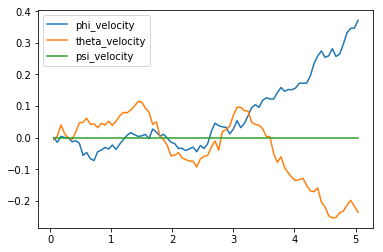

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

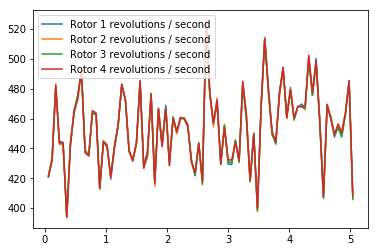

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.24590753  -1.66081863  31.8373593    0.34013946   6.13381549   0.        ]
[-2.21320052  1.25744943  7.04808721]
[ 0.37166706 -0.23566533  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

0.00663366270314 0.948756793317 [  0.           0.          10.00663366]
0.0235273903389 0.85758117472 [  6.48737584e-03   3.51012448e-03   1.00135299e+01]
0.0300046908449 0.827494044437 [  1.14373920e-02   9.26108837e-03   1.00093062e+01]
0.0346120473893 0.80708988162 [  0.01099761   0.0192661   10.00434834]
0.0587761575555 0.709674511318 [  0.01388195   0.03492621  10.00996799]
0.0796978601832 0.63444341267 [  0.01614767   0.05174825  10.01180194]
0.0851749954718 0.615791439433 [  0.01394042   0.06428876  10.00694581]
0.084080721736 0.619487129528 [  3.59639461e-03   7.01197981e-02   1.00103645e+01]
0.103337044106 0.556503251013 [ -0.01818329   0.07399128  10.01116247]
0.132724686479 0.467556757088 [ -0.05442564   0.07390163  10.00439742]
0.174841110396 0.351919552687 [ -0.10396559   0.06866741  10.00220811]
0.238039082179 0.19829073199 [ -0.16174176   0.06655955  10.00973777]
0.321448593263 0.0229182914744 [ -0.22391056   0.07684195  10.02069608]
0.408831372176 -0.135535130516 [ -0.

22.1794299063 -2.33693604916 [-15.58351007   0.23872344   3.64280361]
22.7610189182 -2.34047302793 [-15.93845956   0.20559377   3.38303441]
23.3684686134 -2.34398732128 [-16.31051303   0.17372387   3.11576829]
23.9988937587 -2.34745422731 [-16.70259615   0.14438925   2.84809165]
24.6571977424 -2.35089289537 [-17.11068606   0.11990147   2.57338979]
25.3507277677 -2.35433000433 [-17.52847883   0.10112884   2.27887991]
26.0433720415 -2.35758703474 [-17.94576263   0.07542113   1.97781171]
26.7039642974 -2.36054183676 [-18.34782145   0.03858933   1.68244649]
27.3441718005 -2.3632742265 [ -1.87286040e+01  -2.27551705e-04   1.38465975e+00]
28.0473887106 -2.36613692398 [-19.1067579   -0.02878037   1.08814956]
28.7354606117 -2.36880708964 [-19.48220656  -0.04040215   0.78714809]
29.403892437 -2.37128546188 [-19.83551268  -0.04283942   0.47445966]
30.0673828928 -2.37364018349 [-20.18582816  -0.03513388   0.15357915]
30.5801743032 -2.37539237655 [-20.55567364  -0.02450066   0.        ]
Episode = 

20.0847418979 -2.32258317571 [-11.8957998    1.40684638   3.21790428]
20.6864946044 -2.32698972887 [-12.21301358   1.44532186   2.97184083]
21.3023589918 -2.3312538428 [-12.54068489   1.48273422   2.72106012]
21.9330972816 -2.33538396984 [-12.88119186   1.5190447    2.46713927]
22.578607277 -2.33938242611 [-13.23589324   1.55654586   2.21383182]
23.2359099223 -2.34323542818 [-13.60271603   1.60091205   1.96771816]
23.9049340408 -2.3469486255 [-13.97881961   1.64751651   1.72140208]
24.5935833561 -2.35056831283 [-14.35842261   1.7016474    1.46648665]
25.2914752811 -2.35404342463 [-14.73635195   1.75897831   1.20385498]
25.9939111829 -2.35735998766 [-15.1185315    1.81187776   0.93649808]
26.7057787814 -2.36054975911 [-15.50768429   1.86278374   0.66468925]
27.4210360048 -2.36359401592 [-15.89557471   1.90464434   0.37918304]
28.1256799781 -2.3664470969 [-16.27832372   1.93491751   0.08756126]
28.6141107558 -2.36834517293 [-16.65914635   1.95496441   0.        ]
Episode =    4, score = 

18.9311068087 -2.31339273199 [-11.18187601   0.94709195   3.19786115]
19.2910457809 -2.31637212917 [-11.33124685   0.93585822   2.97605928]
19.6545159848 -2.31927558601 [-11.48723332   0.91950201   2.75221934]
20.0285325566 -2.32215870801 [-11.6531314    0.9041355    2.52873434]
20.4201533361 -2.32506983106 [-11.83027452   0.89065711   2.3007783 ]
20.8265543312 -2.32798057339 [-12.01706868   0.87648229   2.06699664]
21.2430229232 -2.330853273 [-12.21259042   0.86186379   1.83143129]
21.6764993812 -2.33373141814 [-12.41552645   0.85431776   1.59334482]
22.1198947395 -2.33656395866 [-12.61432718   0.85479563   1.34922807]
22.5600646666 -2.33927061967 [-12.81243486   0.85143081   1.103801  ]
23.0081053878 -2.34192392364 [-13.01938286   0.84372093   0.8549984 ]
23.4700034672 -2.34455774197 [-13.23277698   0.83701366   0.59978717]
23.9356574421 -2.3471143682 [-13.44640776   0.8290248    0.33977513]
24.4021394014 -2.34958170739 [-13.66134004   0.8157063    0.07490694]
24.6890226974 -2.351054

21.7240404518 -2.33404040574 [-13.41184305   0.82850215   2.51630475]
22.2433377684 -2.3373333511 [-13.66219516   0.84903839   2.26789578]
22.754261655 -2.34043292587 [-13.90793923   0.8707118    2.02438938]
23.2556226723 -2.34334776123 [-14.15438979   0.88850659   1.7872737 ]
23.7564386887 -2.3461417519 [-14.40820888   0.90127622   1.55304641]
24.2686737055 -2.34888506271 [-14.67330781   0.91237308   1.31700719]
24.7988997487 -2.35161016292 [-14.95067937   0.92410865   1.07588828]
25.3494246384 -2.35432371547 [-15.23708326   0.9451277    0.83278632]
25.9073674621 -2.35696070891 [-15.52170662   0.96864354   0.58298269]
26.4519450528 -2.35943131766 [-15.79766362   0.9803124    0.32603096]
26.9765666819 -2.36172056237 [-16.06638408   0.98407713   0.07389452]
27.3160816394 -2.36315692633 [-16.33234378   0.98373786   0.        ]
Episode =    8, score =  -4.733 (best =  -4.516), noise_scale = 0.10.00661639450704 0.948866525248 [  0.           0.          10.00661639]
0.0226757048462 0.86167

12.7749719924 -2.23840022128 [-8.04384932  1.61493854  6.88381587]
13.4280402978 -2.24938175887 [-8.4331998   1.71718345  6.72234295]
14.1027500377 -2.25973235769 [-8.82092971  1.82566887  6.54384854]
14.7926837912 -2.26940422042 [-9.21426963  1.93358848  6.35517431]
15.4927185468 -2.27839261623 [-9.61961656  2.03838072  6.16527873]
16.2056849346 -2.28679699004 [-10.03574201   2.14138193   5.971439  ]
16.9324078997 -2.29467729508 [-10.46238228   2.2457127    5.77568708]
17.6811324398 -2.30215631257 [-10.89786462   2.35462698   5.57135916]
18.439491493 -2.30914549138 [-11.32949389   2.46459251   5.35459491]
19.1951512139 -2.31558871888 [-11.74544436   2.57652736   5.12682051]
19.9511250844 -2.32157044073 [-12.15361377   2.68244903   4.88493772]
20.7010210643 -2.32709308884 [-12.55670782   2.7803455    4.63603226]
21.4554857874 -2.33227781799 [-12.95209688   2.88013224   4.37674334]
22.2149450757 -2.33715710918 [-13.34339007   2.98002501   4.10847001]
22.982741401 -2.34177636053 [-13.734

6.17687304233 -2.01595295799 [-3.86148555  1.17546601  8.86007851]
6.67320992111 -2.04592777187 [-4.17459341  1.25345524  8.75483872]
7.18469776017 -2.07303106459 [-4.49883625  1.33425909  8.64839759]
7.71101334776 -2.09761164472 [-4.83393005  1.4165844   8.5395011 ]
8.25330210218 -2.12002528393 [-5.1791158   1.50253749  8.42835119]
8.81940353303 -2.14079222453 [-5.53177753  1.59657662  8.30895062]
9.39799587076 -2.15968931462 [-5.89035145  1.69632336  8.18867894]
9.9727634994 -2.17649521988 [-6.24684474  1.80219658  8.07627781]
10.5457134435 -2.19158820849 [-6.59217073  1.9172272   7.96368449]
11.1157949542 -2.20519338835 [-6.92804736  2.04027139  7.85252379]
11.6966035144 -2.2178019695 [-7.26245808  2.17314686  7.73900143]
12.30288872 -2.22979257376 [-7.6013676   2.31205152  7.6105304 ]
12.9128285225 -2.2408039195 [-7.94206142  2.44695811  7.47619101]
13.5134746323 -2.25074546092 [-8.27716185  2.58275538  7.3464426 ]
14.1106405625 -2.25984795097 [-8.59910707  2.72567745  7.21414396]


Episode =   13, score =  -4.656 (best =  -4.504), noise_scale = 0.80.00660398320007 0.948945429973 [  0.           0.          10.00660398]
0.0182396234478 0.883670516751 [  2.85291049e-03  -4.34229045e-03   1.00110444e+01]
0.0353019859664 0.804096307832 [  6.79490509e-03  -1.58676075e-02   1.00126395e+01]
0.0508413893009 0.740178470198 [  2.30287404e-03  -3.27962760e-02   1.00157422e+01]
0.0783342039556 0.639148563989 [ -0.01615734  -0.05147034  10.01070652]
0.118873153105 0.508512350547 [-0.04945141 -0.06926499  9.99984325]
0.202850137879 0.281237956891 [-0.09836102 -0.08764588  9.98315676]
0.310666462377 0.0441209715712 [-0.1629225  -0.10975193  9.96200797]
0.434002234833 -0.177250547199 [-0.24180422 -0.13516008  9.94296207]
0.560054052179 -0.364613813099 [-0.33310102 -0.15570101  9.92874798]
0.690678096646 -0.52806465727 [-0.43670811 -0.16633895  9.91236896]
0.839855685257 -0.685690301776 [-0.55371102 -0.17118402  9.88503936]
1.01542912314 -0.840973362579 [-0.68292007 -0.1779363   

13.9823433623 -2.25795337943 [-9.0537879   1.89186503  6.96330956]
14.4300486649 -2.26442816181 [-9.25764779  1.97676444  6.80436357]
14.8709207849 -2.27044803636 [-9.46996671  2.04770498  6.64675091]
15.2901394085 -2.27587075154 [-9.68177494  2.10723643  6.49887195]
15.6909720076 -2.28080150338 [-9.89108678  2.16429342  6.36440819]
16.0955074988 -2.28554391764 [-10.09924411   2.22206522   6.22580183]
16.5023211702 -2.29009246167 [-10.3098647    2.2721648    6.07970833]
16.9082965487 -2.29442607586 [-10.5289866    2.31976327   5.94045332]
17.3364439939 -2.29878891789 [-10.76051884   2.37601646   5.80009131]
17.7900858467 -2.30319507761 [-11.00601521   2.43605389   5.65198326]
18.2656969024 -2.30759226683 [-11.26802967   2.49784081   5.50017358]
18.7634146756 -2.31196767659 [-11.54776168   2.56147076   5.34581776]
19.28065615 -2.31628760827 [-11.84501778   2.62293335   5.18729498]
19.8121964688 -2.32050368265 [-12.15983489   2.68351505   5.03115347]
20.3441454836 -2.32451316368 [-12.489

5.91873877345 -1.99867267215 [-3.35043407  1.15533288  8.58702818]
6.35577199716 -2.02722096842 [-3.62512805  1.21836525  8.4877213 ]
6.79635282116 -2.05277649404 [-3.90629981  1.28552512  8.39547211]
7.24502095699 -2.07600685248 [-4.1852094   1.36483292  8.30502136]
7.70465721407 -2.09733244916 [-4.45834856  1.450637    8.20432835]
8.16690473595 -2.11663120622 [-4.72572772  1.53179081  8.0906138 ]
8.61716064838 -2.1336527072 [-4.98892164  1.59978149  7.97154248]
9.04887837019 -2.14854636925 [-5.25201723  1.65356613  7.85670499]
9.46992748173 -2.16189319836 [-5.52142158  1.70010246  7.75159656]
9.89463438337 -2.17431453568 [-5.80060926  1.74687552  7.65285039]
10.332727628 -2.18615521207 [-6.08975983  1.7963404   7.5533726 ]
10.7854219956 -2.19746876763 [-6.38885403  1.84681454  7.45024658]
11.249667306 -2.20820527571 [-6.6981889   1.89625305  7.34477465]
11.7277453076 -2.21844561169 [-7.01619427  1.94635609  7.23480505]
12.2177143402 -2.2281742811 [-7.34176159  1.99347938  7.11752663]

30.1956051563 -2.37408370926 [ 21.2768903   -1.5607251    2.64201025]
30.9487312712 -2.37661702826 [ 21.63683455  -1.60143905   2.28954233]
31.7509572324 -2.37918751422 [ 22.03303134  -1.63665987   1.91873397]
32.5985809081 -2.38177025898 [ 22.47185038  -1.66637155   1.53964102]
33.4292628572 -2.38417814442 [ 22.91464427  -1.67616395   1.16154536]
34.2649358391 -2.38648616762 [ 23.34835034  -1.68918344   0.77259794]
35.1677761773 -2.38885997479 [ 23.81208701  -1.71951801   0.36382884]
36.0876726285 -2.39115988916 [ 24.31107836  -1.77659426   0.        ]
36.7233080273 -2.39268363689 [ 24.83683666  -1.88647136   0.        ]
37.3805998602 -2.39420627671 [ 25.35056194  -2.03003792   0.        ]
Episode =   18, score =  -5.316 (best =  -4.504), noise_scale = 3.20.00657315345911 0.949141561192 [  0.           0.          10.00657315]
0.0210108789541 0.869800824524 [  3.62209177e-04  -7.29795730e-03   1.00133507e+01]
0.0406774047834 0.781267438714 [  4.15740595e-03  -1.78598994e-02   1.001866

5.84076379813 -1.99319767801 [-3.74274726  0.01347662  7.91546007]
6.23691371286 -2.01979643686 [-3.97114437  0.02644674  7.76067739]
6.632409439 -2.0436101039 [-4.19996105  0.03205026  7.59960188]
7.01182244299 -2.06425592426 [-4.42091848  0.03025948  7.43935552]
7.37936585103 -2.08248090491 [-4.63005937  0.02753666  7.27823018]
7.74060321025 -2.09890606829 [-4.82653087  0.02701342  7.11294108]
8.09971889345 -2.11394748211 [-5.01011928  0.02973948  6.94013987]
8.45442137318 -2.12768684519 [-5.18042046  0.03321647  6.75921557]
8.8023822186 -2.1402026531 [-5.33833956  0.03638569  6.57234302]
9.1417956745 -2.15158668985 [-5.48536099  0.0370717   6.38063702]
9.46902075504 -2.16186560531 [-5.62275849  0.0321125   6.18585023]
9.78339199276 -2.17115528549 [-5.75241756  0.02256519  5.99159075]
10.0978014227 -2.17992152058 [-5.87659425  0.01702955  5.79582238]
10.4244465007 -2.1885195938 [-5.99822424  0.01673861  5.59051635]
10.7580026221 -2.19680821688 [-6.11967641  0.01162792  5.37330171]
11

0.0599274014937 0.705349050393 [  1.80784250e-02  -9.42388361e-03   1.00324251e+01]
0.0926001390205 0.59110011161 [  0.02926315  -0.01903783  10.04429916]
0.138382537468 0.451279713977 [  0.05938306  -0.02625666  10.05274282]
0.202980899847 0.280918199573 [  0.10714911  -0.03496956  10.06086222]
0.297426967076 0.0707114075599 [  0.17140876  -0.05369507  10.07232314]
0.410318976126 -0.138045459097 [  0.25004685  -0.08345405  10.07681807]
0.53861264597 -0.335027959539 [  0.33900309  -0.11963586  10.0799737 ]
0.673834075759 -0.508463808314 [  0.43325789  -0.14930795  10.09126824]
0.788215292185 -0.634152305304 [  0.52805497  -0.16645331  10.09370702]
0.879667437878 -0.723466280548 [  0.61958223  -0.1817761   10.0783091 ]
0.960531379022 -0.795429911723 [  0.70248247  -0.20916155  10.04888735]
1.04472708668 -0.864273934629 [  0.77293022  -0.25251618  10.01928068]
1.13202816726 -0.929897608141 [  0.82978235  -0.30124067  10.00100515]
1.22734257123 -0.995666422761 [ 0.87358453 -0.34388352  9.

12.7917044331 -2.23869452694 [ 8.80335729 -1.01765486  7.02930772]
13.384391773 -2.24867880644 [ 9.23997431 -1.03023823  6.88582077]
13.9980051994 -2.25818639094 [ 9.68655245 -1.04665122  6.73519848]
14.6256337667 -2.26714058869 [ 10.14347406  -1.06469779   6.58253809]
15.2661627801 -2.27556812449 [ 10.60844729  -1.08342116   6.42570567]
15.9208325704 -2.28352393611 [ 11.08008745  -1.10350548   6.26276036]
16.5828562227 -2.29096801468 [ 11.55087526  -1.12634165   6.09436069]
17.2496313898 -2.29792080299 [ 12.02066354  -1.15076563   5.92179778]
17.9183955251 -2.30440307637 [ 12.4903712   -1.17318434   5.74516002]
18.5900940599 -2.31046920344 [ 12.96080801  -1.19254354   5.56325749]
19.2728011424 -2.31622364944 [ 13.44269999  -1.21003958   5.37993842]
19.9439226593 -2.32151548434 [ 13.93122176  -1.21871381   5.20601291]
20.5826978107 -2.32624714317 [ 14.41349011  -1.20781628   5.03860858]
21.2005218353 -2.33056504013 [ 14.88630281  -1.17684468   4.86262566]
21.80893221 -2.33458895188 [ 1

0.163832533879 0.380978070695 [  0.06725702  -0.02888754  10.06768797]
0.221986204458 0.235379999424 [  0.09284759  -0.05783383  10.07130478]
0.283850478356 0.0986416702535 [  0.13129965  -0.07385317  10.07869766]
0.361155193902 -0.0518891688458 [  0.18688317  -0.08678498  10.08748704]
0.46202565833 -0.221874182128 [  0.26033461  -0.11094068  10.09075037]
0.583612567089 -0.396157430296 [  0.35222233  -0.14382134  10.0875689 ]
0.72175986411 -0.563202829249 [  0.46262632  -0.17354599  10.08558756]
0.858111837658 -0.703216114415 [  0.59195788  -0.19542338  10.07073058]
1.00365739819 -0.831418698853 [  0.73928046  -0.22239677  10.04198017]
1.17128199466 -0.957682676286 [  0.90392596  -0.25811909  10.00923694]
1.40624735483 -1.10506730056 [ 1.0868716  -0.29765287  9.97827711]
1.67787642464 -1.24332362018 [ 1.29053674 -0.33534817  9.94800849]
1.97424831754 -1.36551548558 [ 1.51670713 -0.3722596   9.91471842]
2.29814674621 -1.47409757017 [ 1.76502706 -0.41031753  9.87719784]
2.64760021167 -1.

9.15189802244 -2.15191390411 [ 6.59644377 -0.26274348  7.70728924]
9.27769505555 -2.15593478394 [ 6.60068685 -0.25574742  7.57873921]
9.41286824644 -2.16014747109 [ 6.60049468 -0.25270379  7.44033022]
9.55533817786 -2.16447119616 [ 6.59546092 -0.25888914  7.29901188]
9.69431484235 -2.16857830595 [ 6.58540422 -0.27109436  7.16218374]
9.81949604983 -2.17218772515 [ 6.5706758  -0.28030338  7.03148313]
9.93152911109 -2.17534818571 [ 6.55193566 -0.28097856  6.90138511]
10.0461128541 -2.17851451794 [ 6.53159555 -0.27741369  6.76289639]
10.1772707174 -2.18205943977 [ 6.51321911 -0.27877491  6.61472331]
10.3236847197 -2.18592003156 [ 6.49985442 -0.28747507  6.46364477]
10.4807824311 -2.18995318871 [ 6.49408368 -0.29941481  6.31271606]
10.6495521827 -2.19416520445 [ 6.49768419 -0.31163851  6.15977052]
10.8360577874 -2.19868059902 [ 6.51268387 -0.32549497  6.00212105]
11.0298008853 -2.20322343034 [ 6.5314774  -0.33546019  5.83713671]
11.2191792925 -2.2075251352 [ 6.5475913  -0.34272022  5.671132

0.292762066278 0.0802310364212 [  0.13661294   0.04657312  10.10957601]
0.386313006469 -0.0968161861622 [  0.21832995   0.05160988  10.11637318]
0.504690156528 -0.28641129056 [  0.31215483   0.06906133  10.123474  ]
0.632078514475 -0.458080473383 [  0.41307158   0.08788349  10.13112345]
0.771363877272 -0.61667413229 [  0.5152612    0.10907593  10.14702675]
0.921070037492 -0.761074755368 [  0.61233971   0.14940695  10.15932338]
1.05262616165 -0.870441820727 [  0.69810359   0.20012788  10.15439469]
1.14806457661 -0.941371398377 [  0.76740579   0.24772352  10.13293527]
1.21326172724 -0.98630678169 [  0.81672284   0.28999015  10.10654874]
1.25502172542 -1.01372469589 [  0.84419208   0.33139592  10.07943372]
1.27290103803 -1.02515599325 [  0.85228057   0.37095569  10.04966478]
1.26656935528 -1.02112836113 [  0.84424754   0.40548384  10.01683797]
1.27795290466 -1.02835349807 [ 0.82091651  0.43993404  9.98289764]
1.32173607386 -1.05548385112 [ 0.78261039  0.48318915  9.94406347]
1.35983228747

19.9339956576 -2.32143967687 [-15.35067742   1.13042784   6.54710961]
20.5156470263 -2.32576364477 [-15.81892722   1.16806397   6.47134416]
21.1063491811 -2.32992244091 [-16.30145245   1.19545169   6.39055495]
21.7185777185 -2.33400496699 [-16.79903462   1.20993414   6.29039103]
22.3742190118 -2.33814024373 [-17.31903624   1.23091014   6.17572737]
23.0763873843 -2.34231963349 [-17.85970739   1.26124295   6.04456296]
23.8179827629 -2.34647733133 [-18.42095871   1.29662991   5.89960586]
24.6168427621 -2.350687177 [-18.99874401   1.34488906   5.72679031]
25.4554170054 -2.35483320981 [-19.5859011    1.41804346   5.54852756]
26.276395715 -2.35864565432 [-20.1656537    1.50307826   5.39233625]
27.0654549295 -2.36209996946 [-20.73850422   1.58663775   5.25968704]
27.8513068935 -2.36535271341 [-21.32666547   1.67488431   5.15024289]
28.634328178 -2.36842239256 [-21.91847006   1.76603447   5.05017635]
29.4412908485 -2.37142091467 [-22.51712323   1.86207728   4.93790966]
30.3047497454 -2.3744583

0.395535796644 -0.11283953959 [  0.15797259   0.13861005  10.09895315]
0.479278419681 -0.248448240925 [  0.18960865   0.17977501  10.10989476]
0.542287888522 -0.340160372138 [  0.21298031   0.22019723  10.10911034]
0.582370457756 -0.394518722628 [  0.22449004   0.24991113  10.10796928]
0.612890277331 -0.434025096453 [  0.22203147   0.2785765   10.11228231]
0.635894330024 -0.462794728186 [  0.20518532   0.3134792   10.11722981]
0.646101006894 -0.475293843194 [  0.17369909   0.35550159  10.11690033]
0.635292809628 -0.462053085739 [  0.12694822   0.40075952  10.10758507]
0.601290353868 -0.419193533997 [  0.06410431   0.44555102  10.09163503]
0.575421401429 -0.38530129135 [ -0.01509747   0.48992463  10.07039931]
0.682966657461 -0.519141039496 [ -0.10956442   0.53214634  10.0412559 ]
0.796540275783 -0.642663995838 [ -0.21906776   0.57178976  10.00568275]
0.99150291319 -0.821434302544 [-0.34395323  0.61250734  9.96495766]
1.22341142645 -0.993065276496 [-0.4852566   0.65441163  9.91625681]
1.

14.8549978853 -2.27023643037 [-8.88199637  0.98936682  5.0163653 ]
15.2653799961 -2.27555822938 [-9.1091706   0.99810433  4.84189493]
15.6681094544 -2.28052662706 [-9.32522464  1.00478673  4.66190192]
16.0698799349 -2.28525013621 [-9.53689519  1.00670492  4.47372017]
16.4788041565 -2.28983527319 [-9.75651481  1.00136731  4.27907796]
16.9003922556 -2.29434357305 [-9.98954066  0.99383393  4.08298233]
17.3251818837 -2.29867676153 [-10.23035496   0.97844708   3.88362015]
17.7387846887 -2.30270747242 [-10.47414451   0.94792161   3.68328143]
18.1455580946 -2.30650212139 [-10.71435617   0.91428889   3.48308697]
18.5600484673 -2.31020674387 [-10.94443849   0.89012251   3.27451253]
18.9760485801 -2.31377059207 [-11.17120366   0.86271213   3.05786721]
19.3932859886 -2.31719928109 [-11.40274635   0.82546371   2.83492407]
19.8289796798 -2.32063330615 [-11.64337729   0.78745428   2.60185189]
20.2828811817 -2.3240615868 [-11.89592365   0.74937226   2.36241474]
20.7486191178 -2.32743079718 [-12.16064

0.596469953678 -0.412964516871 [-0.2698039   0.09220976  9.76554371]
0.668222283412 -0.501843334321 [-0.27474869  0.10907253  9.71559894]
0.711538602637 -0.551791656987 [-0.27026751  0.11573018  9.67445909]
0.733346234846 -0.57597183294 [-0.24838475  0.12643954  9.64147805]
0.75536553184 -0.599764884988 [-0.21817315  0.13526192  9.59806953]
0.801077612321 -0.647269459286 [-0.20019717  0.14414027  9.54325983]
0.874937982682 -0.719063534949 [-0.2010236   0.15956938  9.485655  ]
0.970007020683 -0.803473171914 [-0.20780576  0.17664063  9.41443937]
1.06801076664 -0.882319052035 [-0.20266844  0.19529147  9.32994914]
1.15722757 -0.947850757177 [-0.18127587  0.22127699  9.24532528]
1.25026723118 -1.010654348 [-0.15419411  0.248332    9.15225888]
1.34485184405 -1.06940001027 [-0.1348587   0.26168332  9.05169017]
1.43781607512 -1.12271008974 [-0.127234    0.26903519  8.95845312]
1.54522650977 -1.17947453101 [-0.13323026  0.27817354  8.86617729]
1.67384250848 -1.24147483299 [-0.15507434  0.289383

13.59116801 -2.25197177473 [-7.31673089  1.56476504  5.29032792]
13.8704884936 -2.25627500823 [-7.29181902  1.64098621  5.06231674]
14.1406214237 -2.26028606378 [-7.26286034  1.70949395  4.83173286]
14.4061416357 -2.26409190123 [-7.23328929  1.77746936  4.60461701]
14.6789895408 -2.26786882213 [-7.20529428  1.85266049  4.37896523]
14.9670570704 -2.27171668712 [-7.18038736  1.93713591  4.1504662 ]
15.2734656982 -2.27566039432 [-7.15994633  2.02909155  3.91557218]
15.5925085462 -2.27961229689 [-7.14598069  2.12160583  3.67507797]
15.9215837242 -2.2835327117 [-7.14051509  2.21250927  3.43144064]
16.2622307187 -2.2874339008 [-7.14296782  2.30399016  3.18472726]
16.6116135339 -2.29127871981 [-7.15179708  2.39554891  2.93573246]
16.9694899365 -2.29506234474 [-7.16584885  2.48953648  2.6858954 ]
17.3389433658 -2.29881378984 [-7.1833169   2.58869201  2.43306554]
17.7209568115 -2.30253739835 [-7.20588787  2.69093083  2.17586188]
18.1111017984 -2.30618693938 [-7.23572292  2.79185486  1.91647599]

2.2118455457 -1.44729134259 [-2.02071137  0.13262933  9.94149516]
2.52159693075 -1.5374420028 [-2.28130801  0.15881777  9.91852885]
2.85439551907 -1.61826301975 [-2.55415151  0.18904213  9.88879812]
3.20840782694 -1.69029964454 [-2.83938948  0.22182362  9.85280528]
3.57771360145 -1.75365231205 [-3.13730713  0.25621477  9.8158083 ]
3.96477458258 -1.80999953923 [-3.44764526  0.29518749  9.77805816]
4.37062623899 -1.86041254628 [-3.77084     0.33712264  9.73733639]
4.79672794666 -1.90578877314 [-4.10642387  0.38110129  9.69079722]
5.24555139888 -1.94692609672 [-4.45305275  0.42534599  9.63284735]
5.71393568028 -1.98402228246 [-4.81088714  0.46904907  9.56600053]
6.203064386 -2.01763742526 [-5.1795736   0.51833789  9.49484711]
6.7183879156 -2.04846565292 [-5.55822435  0.57537567  9.4152121 ]
7.25643569719 -2.07656507951 [-5.948361    0.63693149  9.3288568 ]
7.81105980175 -2.10195338006 [-6.35126967  0.70073689  9.24094675]
8.39074390221 -2.1252964364 [-6.76701039  0.76845069  9.14471718]
8

8.33431887029 -2.12315113609 [-7.40016781 -0.86785699  9.93370593]
8.74942758896 -2.13835533723 [-7.74438729 -0.90167716  9.89663686]
9.1850912111 -2.15298447583 [-8.10903192 -0.93469494  9.85863565]
9.6480749568 -2.16722365936 [-8.49253873 -0.9778808   9.82234457]
10.115146154 -2.18039073539 [-8.87432446 -1.02852518  9.78770349]
10.5821281018 -2.19249716484 [-9.24624445 -1.07218983  9.73630617]
11.0805733983 -2.2043899107 [-9.62395341 -1.12592241  9.66930243]
11.5997482927 -2.21577988178 [-9.99939042 -1.20899826  9.60864039]
12.1021123713 -2.22594431451 [-10.35327154  -1.30609431   9.55725348]
12.5862141082 -2.23503010265 [-10.67874681  -1.40632997   9.49886267]
13.0818998276 -2.24368781156 [-11.00504199  -1.50418323   9.4273254 ]
13.591401604 -2.25197544214 [-11.35821558  -1.59414246   9.36095644]
14.0951538472 -2.25962096244 [-11.73377266  -1.66637805   9.30499687]
14.6192692796 -2.26705339084 [-12.13201537  -1.72612232   9.23886842]
15.1823056631 -2.2745026651 [-12.5562213   -1.790

22.1339325299 -2.33665186608 [-14.6064175    0.72974044   3.20222541]
22.6069999669 -2.33955328582 [-14.90157324   0.71512189   3.00969517]
23.1030457738 -2.34247351746 [-15.20659751   0.6998771    2.80342884]
23.6081467604 -2.34532628161 [-15.51226129   0.68883476   2.59294929]
24.1141392708 -2.34806921143 [-15.82041816   0.68637905   2.39265794]
24.6218077357 -2.35071252195 [-16.12903754   0.68899541   2.19622522]
25.1337193831 -2.35327409884 [-16.43807961   0.6913381    1.99569833]
25.6685665088 -2.35584555485 [-16.7572126    0.70171497   1.79036106]
26.2281784217 -2.35842808914 [-17.07915226   0.73191948   1.58289331]
26.8135916719 -2.36101863619 [-17.39906869   0.78360822   1.36908524]
27.4302895394 -2.36363239831 [-17.71785118   0.85552792   1.14308956]
28.0785278759 -2.36626049033 [-18.04216785   0.94613355   0.90977353]
28.7522371628 -2.36887065331 [-18.37918945   1.04981456   0.67676685]
29.4456920425 -2.37143683344 [-18.73234807   1.15811451   0.44477053]
30.1642167242 -2.373

5.72234554601 -1.98464135551 [ 4.52014045  0.37932072  9.17711562]
6.16244692476 -2.01501992347 [ 4.87788779  0.40115976  9.11660062]
6.62941202818 -2.0434388635 [ 5.24164891  0.43177757  9.04401445]
7.11454778081 -2.06951512739 [ 5.61136608  0.45959267  8.95641096]
7.60087694998 -2.09271574276 [ 5.98778271  0.47540814  8.86231389]
8.08141748084 -2.11320958307 [ 6.37152701  0.48238508  8.77249461]
8.56423540732 -2.13173470808 [ 6.76303521  0.49103926  8.68983906]
9.06338281495 -2.149024649 [ 7.16244014  0.50898794  8.60804527]
9.58767450131 -2.16543640598 [ 7.56971148  0.53563097  8.51766795]
10.1345049459 -2.18091271483 [ 7.98495707  0.5632935   8.41374563]
10.6921464038 -2.1952090826 [ 8.40875169  0.58287797  8.29948326]
11.2498504573 -2.20820935134 [ 8.84205615  0.59183489  8.18404059]
11.807290952 -2.22007550478 [ 9.2855002   0.5966271   8.07483635]
12.3751914724 -2.2311501819 [ 9.7390501   0.60697881  7.97083744]
12.9670632568 -2.24173659977 [ 10.20234639   0.62817359   7.86345672

10.3075513724 -2.18549951775 [ 1.87376828  0.82242173  2.38863864]
10.5177039164 -2.1908851574 [ 1.80865894  0.85234337  2.1432984 ]
10.7326722787 -2.19619525777 [ 1.74350383  0.88207323  1.89290479]
10.9464162562 -2.20128625479 [ 1.67923355  0.90774257  1.64055986]
11.1560305107 -2.20610556663 [ 1.61106399  0.93000854  1.38504202]
11.3674616038 -2.21080167722 [ 1.53733003  0.95034098  1.1202094 ]
11.5812434272 -2.21539001643 [ 1.46220331  0.96683338  0.84779326]
11.7938909132 -2.21980235271 [ 1.38613213  0.9804366   0.57267781]
12.0067606695 -2.22407523439 [ 1.30977481  0.99263785  0.295652  ]
12.2230003293 -2.22827531859 [ 1.23365874  1.0048282   0.01548661]
12.1759229573 -2.22737262627 [ 1.15754892  1.01837404  0.        ]
12.1152037595 -2.22619881586 [ 1.08067789  1.03452587  0.        ]
Episode =   43, score =  -4.787 (best =  -4.123), noise_scale = 3.20.00875167357523 0.935697950921 [  0.           0.          10.00875167]
0.0353186723237 0.804024095878 [ -1.07092348e-02  -6.4717

0.490799653671 -0.265829978627 [  0.3204322   -0.02834042  10.14202703]
0.564948046943 -0.371248063393 [  0.4271314   -0.01539958  10.12241707]
0.657028408264 -0.488499807357 [  5.50863413e-01  -8.49908149e-03   1.00976659e+01]
0.769133358084 -0.614335281655 [  6.92248394e-01  -4.55329529e-03   1.00723317e+01]
0.898696301728 -0.740956842553 [  8.53001353e-01  -3.54602434e-04   1.00453403e+01]
1.05406382684 -0.87155928448 [  1.03445141e+00   4.15722519e-03   1.00154552e+01]
1.26347460014 -1.01915158117 [ 1.23612453  0.01033895  9.98298888]
1.52886573544 -1.17113800986 [ 1.45461614  0.02005887  9.94580928]
1.81078608215 -1.30128730387 [ 1.68675748  0.03014332  9.90611472]
2.10844665418 -1.41322909784 [ 1.9318211   0.04286881  9.86624326]
2.42999023079 -1.51246384186 [ 2.18776301  0.0619437   9.81971648]
2.77177733429 -1.59952009182 [ 2.45283988  0.08054281  9.76160535]
3.12158907046 -1.67377030443 [ 2.72645692  0.09057339  9.69544125]
3.46821758759 -1.7359533934 [ 3.00787793  0.09061261 

52.499571612 -2.41890984957 [ 39.02102807   7.42621824   3.9476747 ]
53.6629988787 -2.42024500992 [ 39.72383771   7.76868043   3.82951927]
55.0237996566 -2.42173636661 [ 40.46134606   8.13738713   3.57493353]
56.4754072144 -2.42324945255 [ 41.18372698   8.56755925   3.27587902]
57.9797085868 -2.4247389342 [ 41.92334897   9.02110515   2.96474553]
59.4661338891 -2.4261379694 [ 42.66405636   9.39997644   2.5978989 ]
60.7867800292 -2.42732453801 [ 43.32411193   9.68106156   2.21839346]
61.944364591 -2.42832367748 [ 43.89872891   9.85918875   1.81355307]
63.0649638807 -2.42925652145 [ 44.3770395    9.99639304   1.30846865]
64.2832486054 -2.43023437259 [ 44.87392615  10.09992983   0.69060737]
65.6555608575 -2.43129307025 [ 45.4991597   10.21273268   0.05633153]
66.5461447567 -2.43195712553 [ 46.14985275  10.39629201   0.        ]
67.4622092142 -2.43262216588 [ 46.86056425  10.60164497   0.        ]
68.5707247504 -2.43340351567 [ 47.76763912  10.80308563   0.        ]
Episode =   45, score = 

8.20986379769 -2.11832675866 [-4.65007064  0.75297048  7.19317732]
8.68098650025 -2.13593795682 [-4.9460053  0.7974652  7.062484 ]
9.1694488984 -2.1524808356 [-5.2531895   0.84846384  6.93220444]
9.66822311195 -2.16781535941 [-5.57364152  0.89553068  6.80094909]
10.1685873071 -2.18182731016 [-5.90458948  0.93666528  6.67266746]
10.6747451287 -2.19478353794 [-6.24388009  0.97645253  6.54558749]
11.1923446454 -2.20692369011 [-6.59141229  1.01602885  6.4150965 ]
11.7183479842 -2.21825171776 [-6.94762969  1.05179198  6.28107368]
12.2475675064 -2.22874384566 [-7.31222715  1.08497024  6.14962988]
12.7815794368 -2.23851652427 [-7.68085854  1.12398196  6.02326106]
13.3264849873 -2.2477396345 [-8.04635906  1.17491649  5.89479057]
13.8792371954 -2.25640718888 [-8.40302474  1.23396371  5.75775125]
14.4299736266 -2.26442710799 [-8.74937535  1.29451771  5.61391944]
14.9764358518 -2.27183963769 [-9.08495685  1.35592997  5.46445097]
15.5179121247 -2.27870193137 [-9.41159816  1.41782349  5.31150952]
1

0.489978640902 -0.26460077898 [-0.32348784 -0.05054528  9.88405448]
0.634367685848 -0.460911358667 [-0.42840238 -0.07368945  9.86772414]
0.770485100498 -0.61575339083 [-0.5401037  -0.08935157  9.85897018]
0.907681971201 -0.749093717753 [-0.66267723 -0.09458923  9.84958449]
1.05926529357 -0.87558919262 [-0.79979326 -0.09323512  9.83376309]
1.23151493533 -0.998417165425 [-0.95356168 -0.09013099  9.81217774]
1.42011880919 -1.11287609542 [-1.12377484 -0.08522748  9.78888351]
1.61775520382 -1.21518251366 [-1.31077442 -0.0717468   9.76476602]
1.83098408716 -1.30962248175 [-1.51666323 -0.05476378  9.74044292]
2.0557727609 -1.39499724379 [-1.73849654 -0.04196021  9.72468398]
2.27145215539 -1.46595586711 [-1.96854763 -0.02459961  9.72169509]
2.49210133138 -1.52954149768 [ -2.20655102e+00   3.37860341e-03   9.71782829e+00]
2.79046863074 -1.60383142016 [-2.45749924  0.03600411  9.70303472]
3.11365161574 -1.67222454326 [-2.72662522  0.06842983  9.68140344]
3.45435693802 -1.73365135126 [-3.01640981

7.84900116149 -2.10357436204 [-6.50748644  0.26694584  8.92543112]
8.42442983271 -2.12656499123 [-6.93353283  0.30575086  8.81485385]
8.98662736992 -2.14647794463 [-7.34703755  0.3351363   8.69554648]
9.54044053892 -2.16402452975 [-7.7442466   0.36686674  8.5706728 ]
10.0864471348 -2.17961356866 [-8.12337687  0.40309696  8.4400267 ]
10.6267685228 -2.19360370448 [-8.483718    0.44135168  8.29830116]
11.1583476507 -2.20615791513 [-8.82989334  0.46870903  8.14025472]
11.6708418658 -2.21726714098 [-9.17270672  0.47173965  7.9736045 ]
12.1675398813 -2.22721120867 [-9.52369868  0.45259325  7.80875205]
12.6653683868 -2.2364546403 [-9.89240701  0.42185619  7.6488948 ]
13.16717141 -2.24511627048 [-10.27679589   0.37739977   7.48702425]
13.6505917403 -2.25290096532 [-10.66337899   0.30867308   7.32146033]
14.1348367595 -2.26020166679 [-11.05819924   0.23386498   7.15722746]
14.6530955938 -2.26751602359 [-11.47437378   0.16998262   6.9912608 ]
15.196523997 -2.27468409314 [-11.91017483   0.1067635

13.6659906757 -2.25314052859 [ 5.32317908 -2.65861744  4.31580585]
14.1028765925 -2.25973421262 [ 5.47527309 -2.73818634  4.11058284]
14.5354817261 -2.26589879923 [ 5.62093334 -2.81605553  3.90150715]
14.9654112667 -2.27169509669 [ 5.75962985 -2.89249144  3.68671002]
15.3959055992 -2.27719516805 [ 5.89243849 -2.96913461  3.4656675 ]
15.8281486543 -2.28243512939 [ 6.0219981  -3.04655665  3.24040609]
16.2600056371 -2.287408917 [ 6.14923147 -3.12330033  3.01252617]
16.6897342457 -2.29211767815 [ 6.27233621 -3.19759976  2.78020173]
17.1185989628 -2.29659477607 [ 6.38962714 -3.27034545  2.54137362]
17.5486552051 -2.30087686625 [ 6.50088767 -3.34378701  2.29601948]
17.9816772708 -2.30499285501 [ 6.60681655 -3.41931397  2.04445325]
18.4175934913 -2.3089513139 [ 6.70802549 -3.49576282  1.78619482]
18.8586894563 -2.31278027255 [ 6.80659218 -3.57302717  1.5209299 ]
19.3116408313 -2.31653941732 [ 6.90567831 -3.65680053  1.25083801]
19.7673906127 -2.32015660467 [ 7.00173156 -3.74187291  0.97621385

1.68375665922 -1.24600869805 [ -0.38663594   1.01992936  10.27719136]
1.79193998741 -1.29340197116 [ -0.44565449   1.08308771  10.26319779]
1.92092981873 -1.34535007532 [ -0.51938554   1.15336605  10.24817823]
2.06471827129 -1.39813738812 [ -0.60972396   1.22666087  10.22833343]
2.22690228501 -1.45207064707 [ -0.71841876   1.30113     10.20735352]
2.405470679 -1.5055518974 [ -0.84513428   1.37981214  10.18052426]
2.58119901909 -1.55301237133 [ -0.9864632    1.4554599   10.13927593]
2.74580203587 -1.59345772587 [ -1.13689102   1.51769342  10.09121759]
2.914732656 -1.631454993 [ -1.29721068   1.57221007  10.0453119 ]
3.10003106382 -1.66955819488 [-1.47222327  1.62630594  9.99849814]
3.39829983212 -1.72419416924 [-1.66438616  1.68110017  9.9471865 ]
3.71979226715 -1.77540198066 [-1.87535618  1.73831616  9.89388008]
4.06910719641 -1.82372506989 [-2.10273746  1.80264244  9.8362727 ]
4.4495378805 -1.8693480029 [-2.34120207  1.87356059  9.76522477]
4.85262417636 -1.9112539034 [-2.59076701  1.

7.31624777515 -2.07946519222 [-1.10421445  2.3848952   6.17286188]
7.54396057856 -2.09013638281 [-1.05146748  2.49078106  5.99828796]
7.76251601115 -2.09985904484 [-0.9874724   2.5964802   5.82143659]
7.97171914894 -2.10872379276 [-0.91096312  2.70213413  5.64137811]
8.17087470505 -2.11678856045 [-0.82070758  2.80777297  5.45760584]
8.36023724756 -2.12413976093 [-0.71678135  2.91366939  5.27021349]
8.54348642426 -2.13097698776 [-0.60217331  3.02045998  5.07914687]
8.72477700882 -2.13748856919 [-0.48007839  3.12838461  4.88368599]
8.90475224137 -2.1437180321 [-0.35105388  3.23711301  4.68341465]
9.08322075347 -2.1496765796 [-0.21497409  3.34588546  4.4776388 ]
9.258019158 -2.15531236051 [-0.07127096  3.45288046  4.26613226]
9.58681792638 -2.16541091375 [ 0.08053649  3.55665331  4.05037188]
10.0660230252 -2.17905803908 [ 0.23915371  3.65836888  3.83149957]
10.5531919304 -2.19177534704 [ 0.40308926  3.75977951  3.60967684]
11.0495334822 -2.20367794378 [ 0.57200571  3.86235701  3.38482924]

0.393973581706 -0.110141755702 [ 0.26240806 -0.0320298   9.90046428]
0.471534572506 -0.236602700944 [ 0.32743784 -0.03993891  9.89584218]
0.538946094142 -0.335494673813 [ 0.38702038 -0.0513133   9.89938758]
0.584224894346 -0.396964287136 [ 0.43711593 -0.05412709  9.90701812]
0.613788442386 -0.435164276233 [ 0.47514873 -0.04817161  9.90953189]
0.635332283509 -0.462101772173 [ 0.49971836 -0.04154576  9.90593183]
0.647847089214 -0.477416119348 [ 0.5097812  -0.03715483  9.89908894]
0.651269434682 -0.481562404541 [ 0.50546552 -0.03396106  9.88815714]
0.646287818625 -0.475521125045 [ 0.48714297 -0.03151408  9.87236924]
0.632131278078 -0.458145815315 [ 0.45481646 -0.02841894  9.85110413]
0.609537955561 -0.429761588448 [ 0.40721793 -0.02590789  9.82358786]
0.576379996577 -0.386577827581 [ 0.34306453 -0.02315488  9.78983941]
0.53797113272 -0.334129462024 [ 0.26355503 -0.02171384  9.74729773]
0.503384314047 -0.284493573276 [ 0.1725482  -0.02796401  9.69712789]
0.462808627288 -0.223094659414 [ 0.

17.5203623599 -2.3006012511 [-10.86390755   3.40712598   6.75067116]
18.0926318019 -2.30601752146 [-11.1994228    3.47732627   6.58411727]
18.6868883536 -2.31130930149 [-11.5385801    3.54957088   6.40126263]
19.3063150272 -2.31649618969 [-11.88458281   3.62575821   6.20402599]
19.9336946332 -2.32143737698 [-12.2256896    3.69826609   5.99026105]
20.5471576353 -2.32599123959 [-12.55323652   3.76223991   5.7683188 ]
21.1479957567 -2.33020729442 [-12.86372082   3.82745201   5.54317708]
21.7426959241 -2.3341613025 [-13.15729521   3.8982355    5.31283479]
22.3362560424 -2.33790712948 [-13.43937787   3.96722217   5.070344  ]
22.9392132657 -2.34152239412 [-13.71728496   4.04013758   4.81820927]
23.5497480065 -2.34500244244 [-13.99123045   4.11495242   4.55643486]
24.1641206841 -2.3483341786 [-14.26344067   4.17569244   4.27501242]
24.7897058252 -2.35156386383 [-14.53787399   4.23949368   3.98766185]
25.4365014482 -2.35474258372 [-14.80901491   4.31762483   3.6901383 ]
26.1020093028 -2.357855

0.178216024725 0.343161900361 [ -0.04995001  -0.07443718  10.05382883]
0.239277776088 0.19547843293 [ -0.09590154  -0.09188331  10.05149293]
0.31591953188 0.0337412863755 [ -0.14848292  -0.10665288  10.06078374]
0.384680220239 -0.0939550116478 [ -0.19535281  -0.11703559  10.07229182]
0.430079614357 -0.170854127298 [ -0.22498272  -0.12301187  10.08208502]
0.45550399549 -0.211653776296 [ -0.2461716   -0.12753029  10.08180211]
0.483758045816 -0.255240570965 [ -0.27480063  -0.14051545  10.06844196]
0.536269504457 -0.331742365946 [ -0.31721392  -0.16244157  10.05661402]
0.597599523864 -0.414427666852 [ -0.37165024  -0.17893027  10.04701901]
0.660650560756 -0.49283778905 [ -0.42898711  -0.18820186  10.0434616 ]
0.708992442107 -0.548927376145 [ -0.47839372  -0.1940731   10.03652563]
0.726055189465 -0.567956997283 [ -0.5164882   -0.19959552  10.00997147]
0.794799234505 -0.640890538125 [-0.54555315 -0.21498648  9.9657404 ]
0.905414765873 -0.747047976554 [-0.57008622 -0.24715304  9.91182449]
1.0

14.2972335645 -2.26254680641 [ 9.40904069 -0.36506859  5.47687572]
14.8805231357 -2.27057544137 [ 9.77831208 -0.36571656  5.2635055 ]
15.471482846 -2.27813116095 [ 10.156408    -0.36312147   5.04804662]
16.0726712755 -2.28528217743 [ 10.5404054   -0.35261911   4.82035324]
16.6739517764 -2.29194878264 [ 10.92277554  -0.3376085    4.58643225]
17.2824884793 -2.29825033722 [ 11.29959585  -0.32801297   4.34512034]
17.9184906269 -2.30440396566 [ 11.67799398  -0.3313186    4.09082195]
18.5625423235 -2.31022855926 [ 12.05378394  -0.33969253   3.83093414]
19.197692689 -2.31560957722 [ 12.42181427  -0.34895554   3.57307712]
19.8302481183 -2.32064309434 [ 12.78726688  -0.36713238   3.32415115]
20.4553986346 -2.3253266251 [ 13.14518234  -0.38914566   3.07892937]
21.0698540895 -2.32967194024 [ 13.49149964  -0.40898501   2.83063056]
21.6751630298 -2.333722714 [ 13.83498534  -0.42346064   2.58328296]
22.2785068547 -2.33755106108 [ 14.1861755   -0.42831408   2.33598272]
22.8957825556 -2.34126807557 [ 

0.701727705397 -0.540706778593 [-0.39903943 -0.19464454  9.89195626]
0.773865104516 -0.619289723494 [-0.39627602 -0.23486887  9.85727978]
0.835817104923 -0.681765635779 [-0.3770209  -0.27889811  9.82010191]
0.882618397618 -0.726202069835 [-0.34738992 -0.32381744  9.78858896]
0.914980172519 -0.755645849074 [-0.3192872  -0.36294141  9.76724844]
0.942189311703 -0.779636107492 [-0.29949937 -0.39093859  9.74824865]
0.977289826366 -0.809602378431 [-0.28986784 -0.41716957  9.72974759]
1.02035929842 -0.844941781266 [-0.29015334 -0.44136705  9.71116109]
1.07878336352 -0.890530813203 [-0.29958151 -0.45902911  9.67982726]
1.16608344718 -0.954060846374 [-0.31635048 -0.48554916  9.6358162 ]
1.26157100522 -1.0179329745 [-0.32866193 -0.52593599  9.59302691]
1.3584069641 -1.07743395964 [-0.33000718 -0.57966261  9.55126283]
1.45659009066 -1.13298816514 [-0.33145569 -0.63435841  9.509224  ]
1.54735824692 -1.18055289739 [-0.3421622  -0.68011447  9.47491842]
1.6523773356 -1.23154309304 [-0.36254936 -0.727

12.65050766 -2.23618844821 [ 8.89866616 -1.23953224  7.48769074]
13.1086604209 -2.24413795563 [ 9.19202233 -1.27033304  7.35369495]
13.5695394149 -2.25163169868 [ 9.48227766 -1.30188931  7.21462755]
14.0347060462 -2.25873051703 [ 9.76981869 -1.33767869  7.07279133]
14.4960677474 -2.26535136795 [ 10.05494911  -1.37207415   6.93095551]
14.9541924475 -2.27154780457 [ 10.33862711  -1.40043262   6.78486729]
15.4177376998 -2.27746643255 [ 10.6231318   -1.42371405   6.62910816]
15.8998433638 -2.28327840843 [ 10.910993    -1.44902618   6.46017582]
16.4046166748 -2.28901939447 [ 11.20550025  -1.47848475   6.27936832]
16.9184039362 -2.29453146813 [ 11.50056045  -1.51325      6.09540651]
17.4289772313 -2.29970525295 [ 11.78477111  -1.55303329   5.90882717]
17.9308021353 -2.30451901464 [ 12.05509829  -1.5926876    5.71698375]
18.429009315 -2.30905259663 [ 12.32192542  -1.62511419   5.5180303 ]
18.9275385985 -2.31336265841 [ 12.59000956  -1.65176882   5.31423978]
19.4256343839 -2.31745926761 [ 12.8

12.7323352421 -2.23764705373 [-6.57804723  2.54573673  6.39144871]
13.1717193743 -2.24519197588 [-6.87348553  2.57826701  6.28003317]
13.5982569172 -2.2520830181 [-7.16076616  2.61050366  6.17301291]
14.0112764694 -2.25838345684 [-7.43493776  2.63972404  6.06338534]
14.4189471097 -2.26427214396 [-7.69530607  2.67313017  5.94948913]
14.8202358628 -2.26977298714 [-7.9528488   2.70062055  5.83323349]
15.2238849082 -2.27503232985 [-8.22008095  2.71939538  5.71559142]
15.6416700304 -2.28020780656 [-8.50074358  2.73633418  5.59540773]
16.0719402985 -2.28527378771 [-8.79521001  2.75301694  5.47628665]
16.5108537836 -2.29018560626 [-9.09058727  2.77341103  5.35314451]
16.950349079 -2.29486378956 [-9.3726616   2.79647224  5.21878476]
17.3805943567 -2.29922727699 [-9.63966044  2.81858143  5.07764752]
17.8065057881 -2.30335058441 [-9.89160942  2.84496931  4.93007294]
18.2231953178 -2.3072081597 [-10.13318852   2.86990224   4.77989544]
18.6206523237 -2.31073531856 [-10.36821811   2.88638529   4.63

9.16860256574 -2.15245354196 [ 1.90892504 -0.65927358  3.39959605]
9.52825851003 -2.16365834773 [ 2.03802167 -0.67060449  3.18036764]
9.89089053166 -2.17420925719 [ 2.16530387 -0.68197055  2.95638389]
10.2556841252 -2.18413946457 [ 2.29040864 -0.69360278  2.72832729]
10.6209258277 -2.1934593586 [ 2.41286537 -0.7052376   2.49717714]
10.9853912393 -2.20219505818 [ 2.53252378 -0.71616245  2.26329499]
11.3497637012 -2.2104147349 [ 2.65010119 -0.72621969  2.02655718]
11.7154358701 -2.21819157445 [ 2.7661084  -0.7359209   1.78659343]
12.0825383594 -2.22556284132 [ 2.8801687  -0.7455322   1.54316254]
12.4514423257 -2.2325661568 [ 2.99230518 -0.75496471  1.29582757]
12.823693477 -2.23925520243 [ 3.10285373 -0.76448156  1.04364181]
13.2008359878 -2.24567550518 [ 3.21251781 -0.77462868  0.7863105 ]
13.5826921257 -2.25183862449 [ 3.32166731 -0.78546007  0.52443525]
13.968542336 -2.25774764935 [ 3.42945819 -0.79654166  0.25745752]
14.3442396933 -2.26321637268 [ 3.5359247  -0.80831499  0.        ]


4.13240933433 -1.83178256393 [ 0.99934216 -0.68860551  7.55553834]
4.28962182377 -1.85096458467 [ 0.99322441 -0.71023003  7.41383261]
4.44028166984 -1.86831322417 [ 0.99068335 -0.72418027  7.27458195]
4.59079679442 -1.8847171892 [ 0.98890688 -0.72957456  7.12768464]
4.7487300893 -1.90101158647 [ 0.97894976 -0.73653277  6.96675244]
4.91061781286 -1.91681548642 [ 0.96042372 -0.74857701  6.79838292]
5.07246789991 -1.93177818581 [ 0.93660812 -0.76317569  6.6273159 ]
5.23212793107 -1.9457812295 [ 0.90861059 -0.7792587   6.45574136]
5.38747644057 -1.95873790391 [ 0.87777682 -0.79450924  6.28480963]
5.53801029722 -1.97070880943 [ 0.84522425 -0.80538668  6.11260064]
5.68899310924 -1.98217708611 [ 0.81204347 -0.81127252  5.93432288]
5.84884568496 -1.99377090633 [ 0.77943999 -0.81613275  5.74672705]
6.01800231107 -2.00546732293 [ 0.7474712  -0.82462875  5.55409764]
6.18760403361 -2.0166445868 [ 0.71522521 -0.83463367  5.36225485]
6.35187548435 -2.02698135827 [ 0.68200951 -0.83946784  5.16960186]

0.388727024021 -0.101032784794 [ 0.27668757 -0.0315078   9.91946834]
0.542311285701 -0.340192963803 [ 0.39307121 -0.0308825   9.88164242]
0.719734481775 -0.56095267256 [ 0.53008419 -0.02875906  9.83910877]
0.919919153882 -0.760051442376 [ 0.68449292 -0.02474745  9.78932122]
1.1480098085 -0.94133250438 [ 0.85509271 -0.02232607  9.72940897]
1.41078998795 -1.10763438709 [ 1.04240137 -0.02929364  9.66090502]
1.69055722636 -1.24909947622 [ 1.24638597 -0.03986556  9.5956943 ]
1.96735653819 -1.36294946973 [ 1.46356743 -0.03670694  9.53291784]
2.25206973097

KeyboardInterrupt: 

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [131]:
## TODO: Train your agent here.
import sys
import csv
import numpy as np
from task import Task
from agents.agent import DDPG

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 1., 0., 0., 0.])   # initial pose, from the ground
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pose = np.array([0., 0., 10.])            # target position

# Setup for take off
num_episodes = 1000
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pose)
agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4',
         'reward']
results = {x : [] for x in labels}
best_flight_path = []
reward_analysis = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    flight_path = [ state ]
    while True:
        rotor_speeds = agent.act(state) 
        next_state, reward, done = task.step(rotor_speeds)
        agent.step(rotor_speeds, reward, next_state, done)
        state = next_state
        max_reward = - np.inf
        flight_path.append(state)
        if done:
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds) + [agent.get_score()]
                
            # let's capture the episode with the best score only
            score = agent.get_score()
            reward_analysis.append(score)
            if (score >= agent.best_score):
                best_flight_path = flight_path
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                                
            print("\rEpisode = {:4d}, score = {} (best = {}), z = {}".format(
                i_episode, score, agent.best_score, task.sim.pose[2]), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = -23.71306120749263 (best = -19.251547349312112), z = 0.00

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

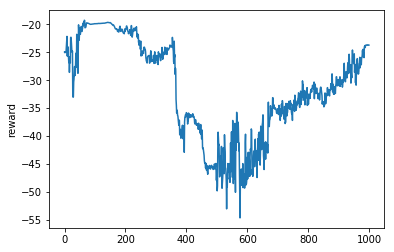

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(reward_analysis)
plt.ylabel('reward')
_ = plt.ylim()

In [134]:
# Best flight path charts

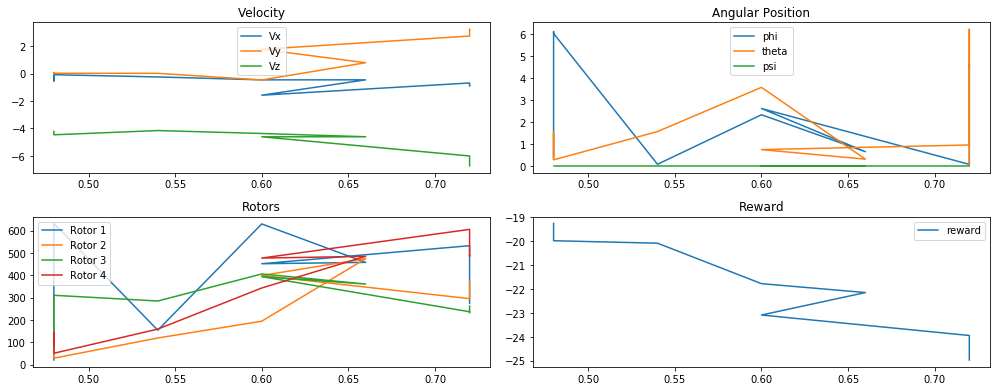

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14, 8))
# Velocity
sp = plt.subplot(3, 2, 1)
plt.plot(results['time'], results['x_velocity'], label='Vx')
plt.plot(results['time'], results['y_velocity'], label='Vy')
plt.plot(results['time'], results['z_velocity'], label='Vz')
sp.set_title('Velocity')
plt.legend()
# angular position
sp = plt.subplot(3, 2, 2)
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
sp.set_title('Angular Position')
plt.legend()
# rotor speeds
sp = plt.subplot(3, 2, 3)
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4')
sp.set_title('Rotors')
plt.legend()
# Rewards
sp = plt.subplot(3, 2, 4)
plt.plot(results['time'], results['reward'], label='reward')
sp.set_title('Reward')
plt.legend()

fig.tight_layout()
plt.show()

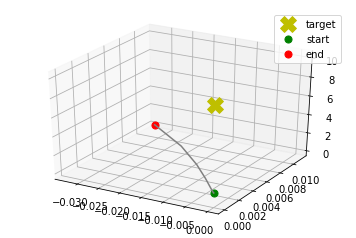

In [130]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D

def render_flight(results, target=None):
    results = np.array(results)
    
    ax = plt.axes(projection='3d')
    ax.plot3D(results[:,0], results[:,1], results[:,2], 'gray')
    if not target is None:
        ax.scatter([target[0]], [target[1]], [target[2]], c='y', marker='X', s=250, label='target')
    ax.scatter(results[0,0], results[0,1], results[0,2], c='g', marker='o', s=50, label='start')
    ax.scatter(results[-1,0], results[-1,1], results[-1,2], c='r', marker='o', s=50, label='end')
    ax.legend()
    
render_flight(best_flight_path, agent.task.target_pos)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
For my practice the reward is conceptually besed on 2 factors, the distance to the target and the acceleration.

First the distance to the target is calculated by a math function which represents a curve that exponentially decays as the distance gets larger and larger, having only positive reward for numbers near 0. (https://www.desmos.com/calculator/it44irjrun)

Second the acceleration, as I want a smoth fly path, not accelerating at high speeds is important.

Calculating the reward was an extensive task. Took me several tries, many many, using only height, using eucledean distance, using other factors, different equations, etc.
At the end this one seems to be kind of performing.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I based my solution on the examples provided on the class, it would have been nearly impossible for me without that foundation. The agent specified was easy to implement afterwads, but took many iterations of NN configurations and hyperparameters to make it work.
For both Actor and Critic I used similar architectures, using relu activation functions, dropouts and batch normalization.

For actors

```
net = layers.Dense(units=32, activation='relu')(states)
net = layers.BatchNormalization()(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(units=64, activation='relu')(net)
net = layers.BatchNormalization()(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(units=32, activation='relu')(net)
net = layers.BatchNormalization()(net)
net = layers.Dropout(0.5)(net)
```

For Critic:

```
net_states = layers.Dense(units=32, activation='relu')(states)
net = layers.BatchNormalization()(net_states)
net = layers.Dropout(0.5)(net_states)
net_states = layers.Dense(units=64, activation='relu')(net_states)
net = layers.BatchNormalization()(net_states)
net = layers.Dropout(0.5)(net_states)

net_actions = layers.Dense(units=32, activation='relu')(actions)
net = layers.BatchNormalization()(net_actions)
net = layers.Dropout(0.5)(net_actions)
net_actions = layers.Dense(units=64, activation='relu')(net_actions)
net = layers.BatchNormalization()(net_actions)
net = layers.Dropout(0.5)(net_actions)
```

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
It was not an easy task to learn, and I'm sure that increasing the time for the episode and making more episodes will enhance optimal flight path.
With that said, the learning cruve at the begining seems to be randominly guessing, and getting bad at it, until at one point it recovers and starts learning and getting better and better at scoring. You can see that on the first plot of rewards.
The performance was ok, I'm happy seeing how the model adapts and starts getting better, but with more time this can be improved I'm sure.
I was hoping to make the quad make a perfect path to the target, and couldn't achieve it. Due to the randomness included as well... some runs did better than others, the one saved here is a good one, but got better ones that could not reproduce, that's why I'm convinced that more time on each episode and more episodes can enhance the results.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

I really got stuck a lot with this project, had to do a lot of trial an error, for hours I coudn't make the quadcopter take off at all to then realize that the simulator was ending my episodes almost instantely after starting, so I had to adjust my initial position not to be on the ground.
The reward function was very hard to design, still not sure how to get an optimal configuration, almost anything is possible. Was very fun to try different curves for reward functions and seeing it behave. I do recognize my flight path is still not optimal, probably more things can be tunned to make it better, even run it with more episodes at some point made it much better, but it is very time consuming.
It was a really fun experience, and I feel there's more I can do, to which I will continue experimenting.